In [1]:
from pandas import read_csv
import sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
if int((sklearn.__version__).split(".")[1]) < 18:
	from sklearn.cross_validation import train_test_split

# otherwise we're using at lease version 0.18
else:
	from sklearn.model_selection import train_test_split

In [3]:
# load dataset
dataframe = read_csv("Desktop/newweather.csv").set_index('Date')
dataset = dataframe.values
print(dataset)

[[82.  75.  66.  ... 30.  29.9  0.1]
 [84.  76.1 68.  ... 30.  29.9  0.1]
 [86.  76.  68.  ... 30.  29.9  0.1]
 ...
 [88.  79.1 70.  ... 29.9 29.8  0. ]
 [88.  80.3 72.  ... 29.9 29.8  0. ]
 [88.  80.  73.  ... 29.9 29.8  0. ]]


In [4]:
tmp = dataset[0:10,[2,5]]
feature='Avgtemp'

predictors=['Minws','Maxdewp','Avgws']

In [5]:
df2 = dataframe[['Avgtemp'] + predictors]
df2

,Avgtemp,Minws,Maxdewp,Avgws
Date,,,,
2019-01-01,75.0,0,64,6.3
2019-01-02,76.1,0,68,4.9
2019-01-03,76.0,0,68,5.8
2019-01-04,76.5,0,72,5.8
2019-01-05,76.5,0,70,4.8
...,...,...,...,...
2020-02-16,79.6,0,68,5.6
2020-02-17,79.7,0,68,4.8
2020-02-18,79.1,0,68,4.5


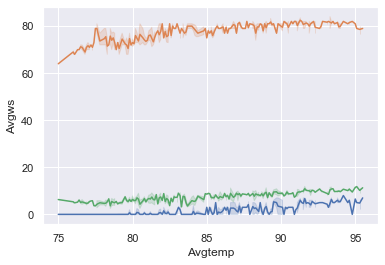

In [6]:
sb.set()
sb.lineplot(df2['Avgtemp'],df2['Avgws'])

In [10]:
#train and test
X=df2[predictors]
y=df2['Avgtemp']

In [11]:
# construct the training and testing split by taking 75% of the data for training
# and 25% for testing

(trainData, testData, trainLabels, testLabels) = train_test_split(X, y, test_size=0.25, random_state=42)


In [12]:
#linear regression model
regressor=LinearRegression()
regressor.fit(trainData,trainLabels)
prediction=regressor.predict(testData)

In [13]:
#accuracy score
acc=regressor.score(testData,testLabels)
acc

0.7812025167617667